In [36]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
from math import *
import diffractsim
diffractsim.set_backend("CPU") #Change the string to "CUDA" to use GPU acceleration
from diffractsim import MonochromaticField, ApertureFromImage, mm, nm, cm
from PIL import Image

In [100]:
def get_img(img_name):
    img = imread(img_name)
    formed_img = rgb2gray(img)
    plt.figure(num=None, figsize=(8, 6), dpi=80)
    plt.imshow(formed_img, cmap='gray');
    return formed_img

def get_amplitude(img_name):
    img = imread(img_name)
    formed_img = rgb2gray(img)
    img_fourier = np.fft.fftshift(np.fft.fft2(formed_img))
    img_amp = abs(img_fourier)
    plt.figure(num=None, figsize=(8, 6), dpi=80)
    plt.imshow(img_amp, cmap='gray');
    return img_amp
    
def get_phase(img_name):
    img = imread(img_name)
    formed_img = rgb2gray(img)
    img_fourier = np.fft.fftshift(np.fft.fft2(formed_img))
    img_phase = np.angle(img_fourier)
    plt.figure(num=None, figsize=(8, 6), dpi=80)
    plt.imshow(img_phase, cmap='gray');
    return img_phase

def form_img(amplitude_img,phase_img):
    formed_img = (amplitude_img*(np.exp(1j*phase_img)))
    plt.imshow(abs(np.fft.ifft2(formed_img)), cmap='gray')
    return formed_img

def mono_evolve(img, screen, wl):
    F = MonochromaticField(
    wavelength=wl, extent_x=18 * mm, extent_y=18 * mm, Nx=1024, Ny=1024)
    F.add(ApertureFromImage(img, image_size=(5.6 * mm, 5.6 * mm), simulation = F))
    F.propagate(screen*cm)
    rgb = F.get_colors()
    F.plot_colors(rgb, xlim=[-7* mm, 7* mm], ylim=[-7* mm, 7* mm])


# Initially Formed Image

1. Evolve n times
2. Decompe n images into phase and amplitude
3. Render into video


# From phase and amplitude

1. Form image
2. Evolve n times
3. Decompose n images into phase and amplitude
3. Render into video

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

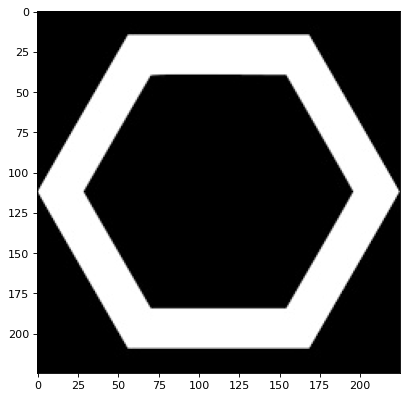

In [14]:
get_img('hexagon.jpg')

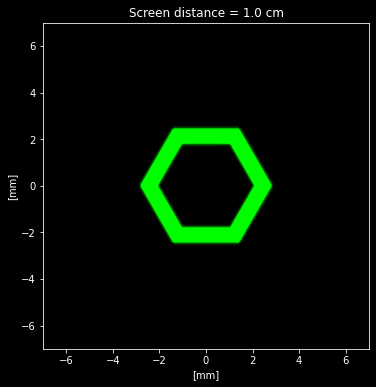

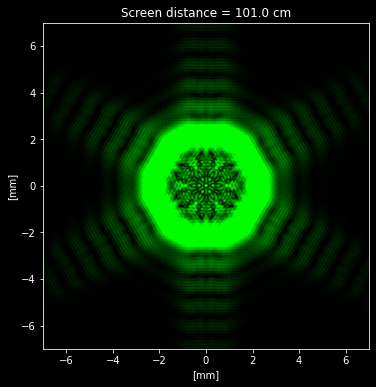

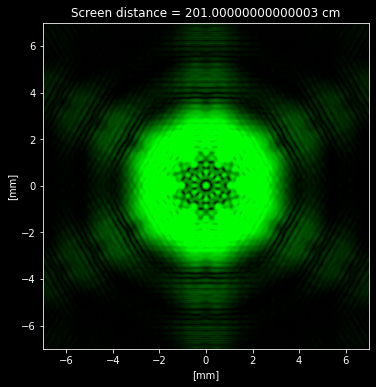

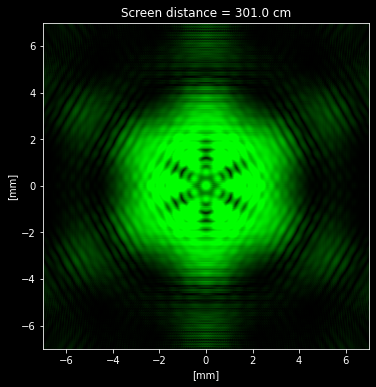

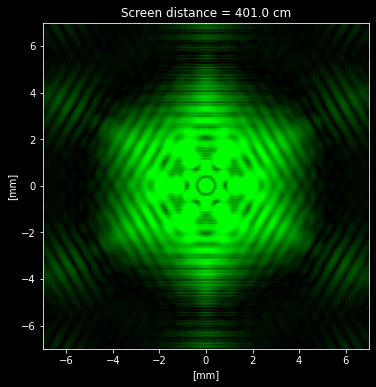

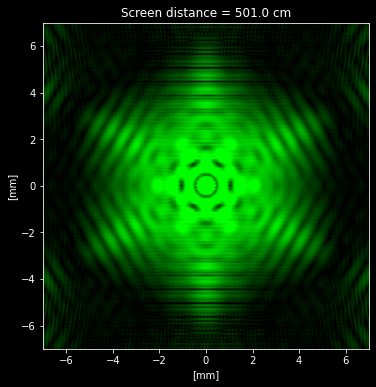

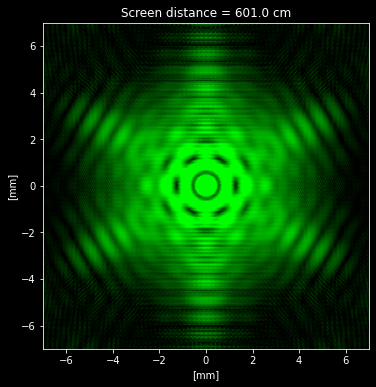

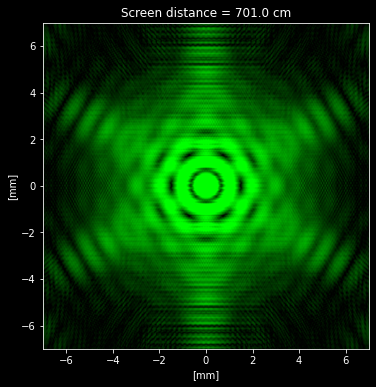

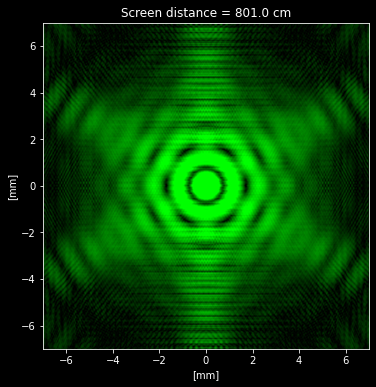

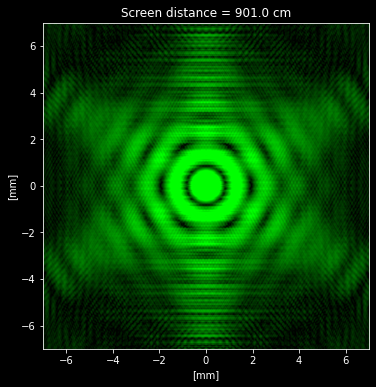

In [105]:
for i in range (1,1000,100):
    mono_evolve('hexagon.jpg',i, 532.8 * nm)

In [111]:
image(mono_evolve('hexagon.jpg',69e300, 532.8 * nm)).save("geeks.jpg")

NameError: name 'image' is not defined

array([[0.86662793, 0.97645429, 0.31217155, ..., 0.81913405, 0.74389525,
        0.84731811],
       [0.74732943, 0.90748622, 0.37572233, ..., 0.34305985, 1.03007837,
        0.84842386],
       [0.62185   , 0.54597975, 0.82461541, ..., 0.70400929, 0.29350118,
        0.86855896],
       ...,
       [0.62185   , 0.86855896, 0.29350118, ..., 1.1964903 , 0.82461541,
        0.54597975],
       [0.74732943, 0.84842386, 1.03007837, ..., 0.62017184, 0.37572233,
        0.90748622],
       [0.86662793, 0.84731811, 0.74389525, ..., 1.17933589, 0.31217155,
        0.97645429]])

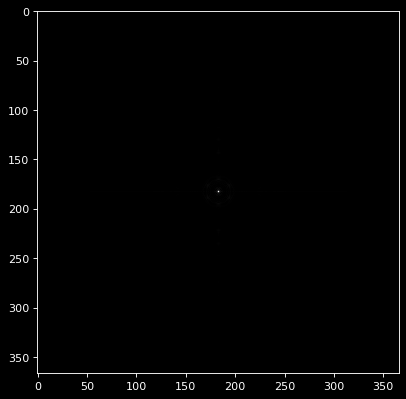

In [107]:
get_amplitude('evolved_hexagon.jpg')

array([[ 0.09001338, -0.98483772,  0.29250967, ..., -0.46620051,
        -0.65561303, -0.48355454],
       [ 0.80195446, -1.6870276 , -1.56628675, ...,  0.3450811 ,
        -2.63792076,  1.27561902],
       [-1.75047796, -2.59128231,  2.32600029, ...,  1.42720507,
        -1.85476877,  1.44806949],
       ...,
       [ 1.75047796, -1.44806949,  1.85476877, ...,  0.03833134,
        -2.32600029,  2.59128231],
       [-0.80195446, -1.27561902,  2.63792076, ..., -0.103238  ,
         1.56628675,  1.6870276 ],
       [-0.09001338,  0.48355454,  0.65561303, ..., -0.91773515,
        -0.29250967,  0.98483772]])

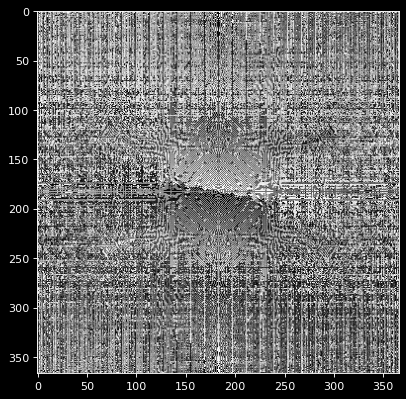

In [108]:
get_phase('evolved_hexagon.jpg')

array([[-1.22785907+1.04537238j, -0.19412889-0.19970584j,
         0.07227218-0.3958808j , ...,  0.25329664-0.67963265j,
         1.1143031 +0.48729948j,  0.04252122+1.72251057j],
       [ 0.3679621 -0.05162382j,  0.3799272 -0.27699019j,
         0.50161464+0.24965684j, ..., -1.34736759+0.29602955j,
        -0.84296091-0.83259606j,  0.94219471-0.46646176j],
       [ 0.0351607 +0.20155567j, -0.60231642-0.28380441j,
         0.0334957 -0.29664398j, ..., -0.00501039-0.15350687j,
        -0.28489575+0.35284194j,  0.53457521+0.42537753j],
       ...,
       [ 0.53457521-0.42537753j, -0.28489575-0.35284194j,
        -0.00501039+0.15350687j, ...,  0.0334957 +0.29664398j,
        -0.60231642+0.28380441j,  0.0351607 -0.20155567j],
       [ 0.94219471+0.46646176j, -0.84296091+0.83259606j,
        -1.34736759-0.29602955j, ...,  0.50161464-0.24965684j,
         0.3799272 +0.27699019j,  0.3679621 +0.05162382j],
       [ 0.04252122-1.72251057j,  1.1143031 -0.48729948j,
         0.25329664+0.67963265

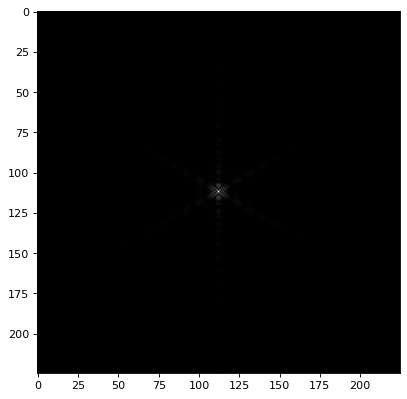

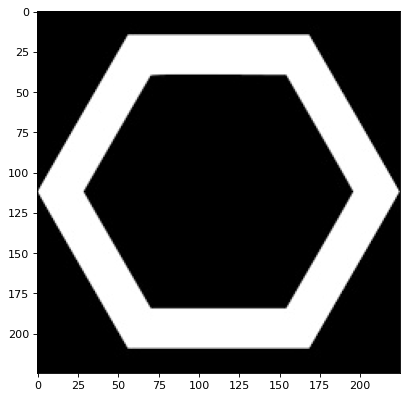

In [31]:
form_img(get_amplitude('hexagon.jpg'),get_phase('hexagon.jpg'))